In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:11<00:00, 110MB/s] 
100% 1.06G/1.06G [00:11<00:00, 97.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 111ms/step - loss: 0.0527 - accuracy: 0.9813 - val_loss: 1.1487 - val_accuracy: 0.7544
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.7690 - val_accuracy: 0.8254
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.5452 - val_accuracy: 0.8072
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0393 - accuracy: 0.9867 - val_loss: 0.8348 - val_accuracy: 0.8164
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.8898 - val_accuracy: 0.8392
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.8648 - val_accuracy: 0.8358
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 1.4821 - val_ac

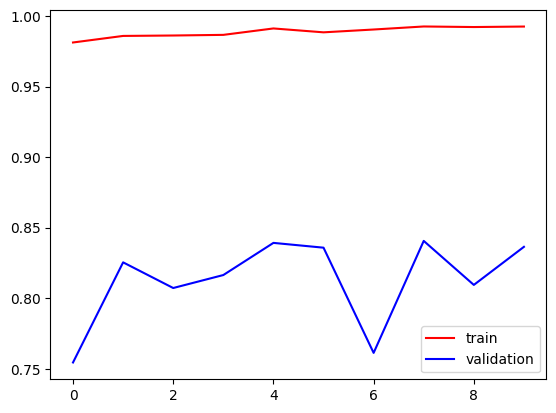

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

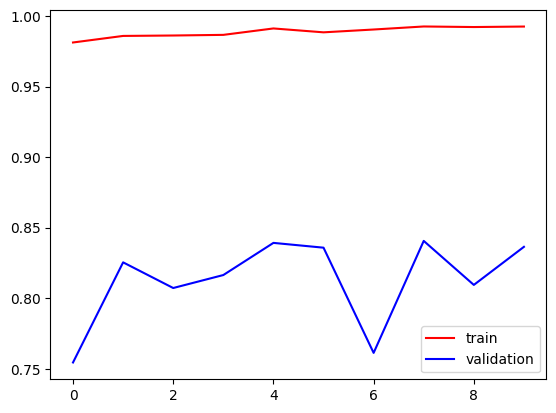

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [18]:
test_img=cv2.imread('/content/dog.jpg')

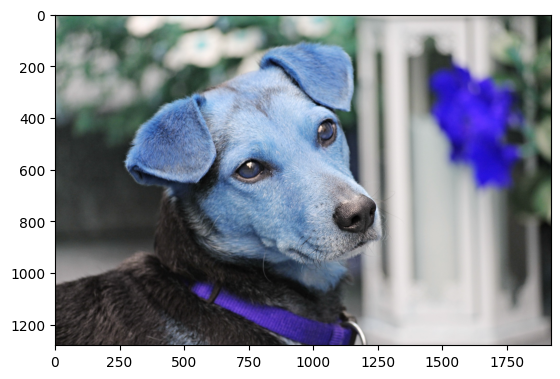

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(1280, 1920, 3)

In [21]:
test_img=cv2.resize(test_img,(256,256))

In [22]:
test_input=test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 405ms/step


array([[0.79492843]], dtype=float32)

In [24]:
test_img=cv2.imread('/content/cat.jpg')

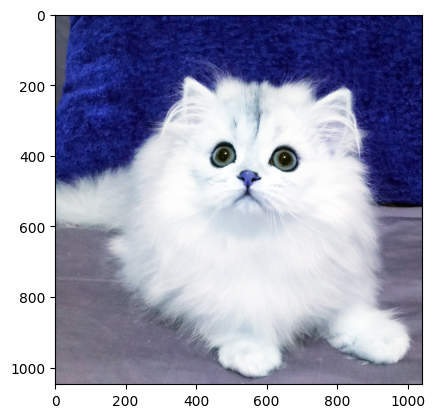

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(1048, 1040, 3)

In [27]:
test_img=cv2.resize(test_img,(256,256))

In [28]:
test_input=test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[4.4399394e-06]], dtype=float32)